In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Student_Performance.csv')

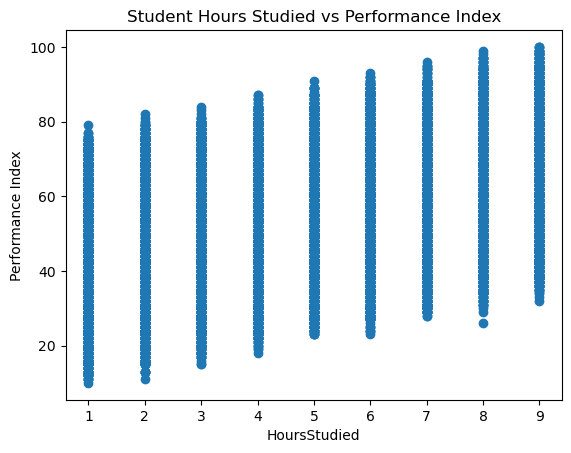

In [3]:
plt.scatter(data['HoursStudied'], data['Performance Index'])
plt.xlabel('HoursStudied')
plt.ylabel('Performance Index')
plt.title('Student Hours Studied vs Performance Index')
plt.show()

In [4]:
X = data[['HoursStudied', 'PreviousScores', 'Sleep Hours', 'Sample Question Papers Practiced']] 
y = data['Performance Index'] 

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred_test = linear_model.predict(X_test)

In [8]:
y_pred_all = linear_model.predict(X_scaled)

In [9]:
data['PredictedPerformanceIndex'] = y_pred_all  

In [10]:
data['PredictedPerformanceIndex'] 

0       91.506314
1       63.483161
2       44.786583
3       36.298302
4       67.391044
          ...    
9995    21.362302
9996    56.203651
9997    72.674436
9998    94.039667
9999    65.607103
Name: PredictedPerformanceIndex, Length: 10000, dtype: float64

In [19]:
pred_data=pd.DataFrame([[10,80,9,5]],columns=['HoursStudied', 'PreviousScores', 'Sleep Hours', 'Sample Question Papers Practiced'])

In [20]:
pred_data=scaler.transform(pred_data)

In [21]:
linear_model.predict(pred_data)

array([81.5082214])

In [22]:
linear_model.score(X_test, y_test)

0.9887144552384186

In [23]:
import pickle as pk

In [24]:
pk.dump(linear_model,open('model.pkl','wb'))

In [25]:
pk.dump(scaler,open("scaler.pkl",'wb'))